In [14]:
import os; os.chdir("..")
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Set
from tqdm import tqdm
from lib.formulas.q_learning import QLearning
from lib.models.Action import Action
from lib.models.GameStatus import GameStatus
from lib.models.Passenger import Passenger
from lib.models.Policies import Policies
from lib.models.Taxi import Taxi
from lib.policies.EpsilonGreedyPolicy import EpsilonGreedyPolicy
from lib.policies.GreedyPolicy import GreedyPolicy
from lib.policies.LegalSamplePolicy import LegalSamplePolicy
from lib.policies.MonteCarloPolicy import MonteCarloPolicy
from lib.policies.RandomSamplePolicy import RandomSamplePolicy

In [15]:
NUM_EPISODES = 300
SEED = np.random.randint(500)

In [16]:
env = gym.make("Taxi-v3", render_mode="ansi")
policy = GreedyPolicy(
    game_env=env,
    seed=SEED
)

In [17]:
def run_one_episode(policy: Policies) -> Tuple[GameStatus, Set[int]]:
    states = []
    states.append(policy.game_env.state)
    for _step in range(1, 200):
        action = policy.next_action()
        if action.game_status == GameStatus.TERMINATED:
            return GameStatus.TERMINATED, states
        if action.game_status == GameStatus.TRUNCATED:
            return GameStatus.TRUNCATED, states
        else:
            states.append(policy.game_env.state)

    return GameStatus.EXITED, states

In [18]:
def aggregate_over_episodes(
    policy: Policies,
    num_episodes: int,
    cumul: bool,
    seed: int = None,
    init_state: int = None,
) -> Set[int]:
    episodes = []
    for _ in tqdm(range(1, num_episodes)):
        policy.reset_hyperparameters(reset_env=True)
        if init_state is not None:
            policy.game_env.back_to(init_state)
        _, states = run_one_episode(policy)
        episodes += states

    if cumul:
        return episodes
    else:
        return set(episodes)

In [19]:
episodes = aggregate_over_episodes(
    policy,
    num_episodes=NUM_EPISODES,
    cumul=True
)

  0%|                                                            | 0/299 [00:00<?, ?it/s]


TypeError: GreedyPolicy.next_action() missing 1 required positional argument: 'action'

In [20]:
def convert_states_to_grid(states: Set[int] | List[int]):
    coordinates = []
    for state in states:
        coordinates.append(Taxi.location(state))

    return coordinates

In [9]:
grids = convert_states_to_grid(episodes)

In [10]:
def graph_states_explorations(
    states: Set[int], 
    cumul: bool,
    display_matrix: bool = False
):
    grid = np.zeros(500)
    for state in states:
        if cumul:
            grid[state] += 1
        else:
            grid[state] = 1

    grid = np.reshape(grid, (25, 20))
    if display_matrix:
        print(grid)
    if cumul:
        plt.imshow(grid, cmap="YlOrBr")
    else:
        plt.matshow(grid)

In [11]:
def graph_grid_explorations(
    coords: List[Tuple[int, int]],
    cumul: bool,
    display_matrix: bool = False
):
    grid = np.zeros((5, 5))
    for coord in coords:
        if cumul:
            grid[coord] += 1
        else:
            grid[coord] = 1
    if display_matrix:
        print(grid)
    if cumul:
        plt.imshow(grid, cmap="YlOrBr")
    else:
        plt.matshow(grid)

[[ 174.   14.   34.    0.    0.]
 [ 182.   90.  307.  216.    0.]
 [ 805.  785. 1156. 1140.    0.]
 [ 671.   46.   65.  405.    0.]
 [ 929.    0.    0.  299.    0.]]


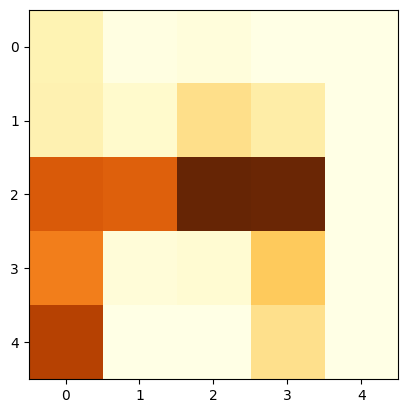

In [12]:
graph_grid_explorations(grids, True, display_matrix=True)

[[  0.   0.   0.  55.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 119.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.  14.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  34.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 182.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.  90.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 307.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 216.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

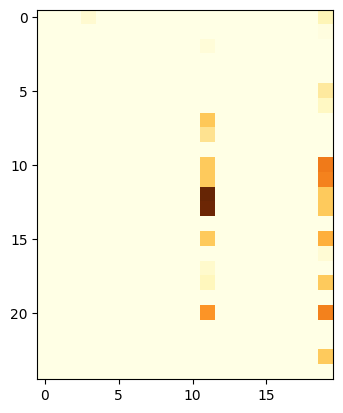

In [13]:
graph_states_explorations(episodes, True, display_matrix=True)